In [34]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential, Model
from keras.regularizers import l2
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D,Input,concatenate, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Main Folder Path
folder_path = "/kaggle/input/kermany2018/OCT2017 "

# Sub Folder Paths
train_dir = f"{folder_path}/train"
val_dir = f"{folder_path}/val"
test_dir = f"{folder_path}/test"

In [36]:
os.listdir(folder_path)


['val', 'test', 'train']

In [37]:
print(f"Train Directory: {os.listdir(train_dir)}")
print(f"Validation Directory: {os.listdir(test_dir)}")
print(f"Test Directory: {os.listdir(val_dir)}")

Train Directory: ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Validation Directory: ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Test Directory: ['DRUSEN', 'CNV', 'NORMAL', 'DME']


In [38]:
normal_train_dir = os.path.join(train_dir, "NORMAL")
normal_train_files = os.listdir(normal_train_dir)[:30]

normal_train_files

['NORMAL-2348959-1.jpeg',
 'NORMAL-6581418-5.jpeg',
 'NORMAL-4969570-7.jpeg',
 'NORMAL-8027454-24.jpeg',
 'NORMAL-4034545-3.jpeg',
 'NORMAL-4949902-8.jpeg',
 'NORMAL-5587871-6.jpeg',
 'NORMAL-1149596-1.jpeg',
 'NORMAL-4670089-8.jpeg',
 'NORMAL-5628931-6.jpeg',
 'NORMAL-7984958-6.jpeg',
 'NORMAL-6580495-13.jpeg',
 'NORMAL-4538057-20.jpeg',
 'NORMAL-867217-3.jpeg',
 'NORMAL-9546378-10.jpeg',
 'NORMAL-9453622-6.jpeg',
 'NORMAL-3863241-1.jpeg',
 'NORMAL-8869683-18.jpeg',
 'NORMAL-114740-1.jpeg',
 'NORMAL-2483932-5.jpeg',
 'NORMAL-5535997-2.jpeg',
 'NORMAL-450923-19.jpeg',
 'NORMAL-66861-2.jpeg',
 'NORMAL-33350-20.jpeg',
 'NORMAL-519372-3.jpeg',
 'NORMAL-452201-5.jpeg',
 'NORMAL-9305707-5.jpeg',
 'NORMAL-3049062-6.jpeg',
 'NORMAL-9409941-4.jpeg',
 'NORMAL-2105194-36.jpeg']

In [39]:
normal_train_files[17]


'NORMAL-8869683-18.jpeg'

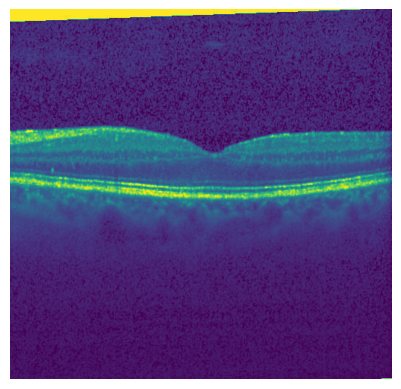

In [40]:
# Image file path
image_file = "NORMAL/NORMAL-8869683-18.jpeg"
image_path = os.path.join(train_dir, image_file)

# Read and display the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

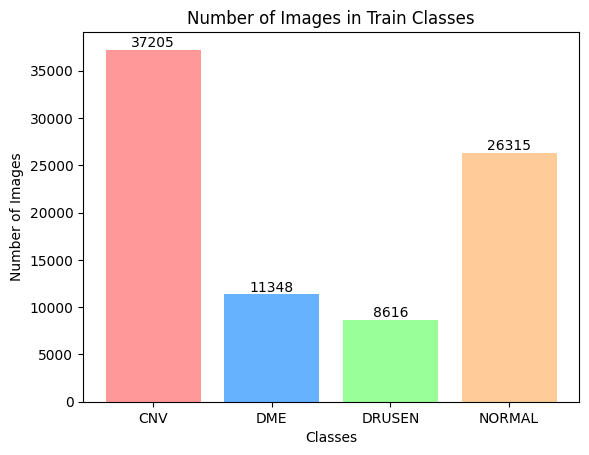

In [41]:
# Specify the directory where the dataset is located
dataset_directory = train_dir

# Create a dictionary to store the counts of images for each class
image_counts = {"CNV": 0, "DME": 0, "DRUSEN": 0, "NORMAL": 0}

# Iterate through the dataset to count the number of images for each class
for class_name in image_counts.keys():
    class_directory = os.path.join(dataset_directory, class_name)
    image_counts[class_name] = len(os.listdir(class_directory))

# Plotting the graph
classes = list(image_counts.keys())
counts = list(image_counts.values())

fig, ax = plt.subplots()
bars = ax.bar(classes, counts, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])

# Display total counts above the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Train Classes')
plt.show()

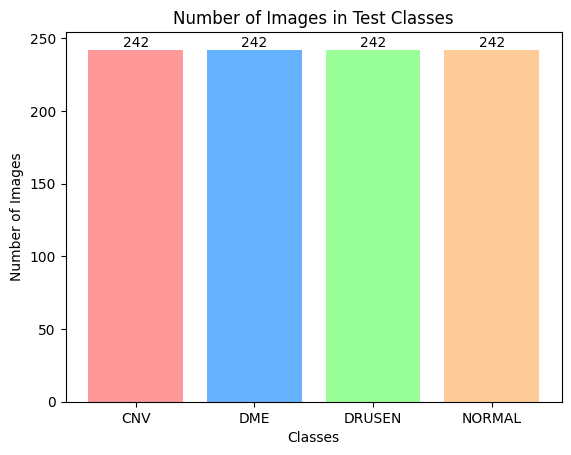

In [42]:
# Specify the directory where the dataset is located
dataset_directory = test_dir

# Create a dictionary to store the counts of images for each class
image_counts = {"CNV": 0, "DME": 0, "DRUSEN": 0, "NORMAL": 0}

# Iterate through the dataset to count the number of images for each class
for class_name in image_counts.keys():
    class_directory = os.path.join(dataset_directory, class_name)
    image_counts[class_name] = len(os.listdir(class_directory))

# Plotting the graph
classes = list(image_counts.keys())
counts = list(image_counts.values())

fig, ax = plt.subplots()
bars = ax.bar(classes, counts, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])

# Display total counts above the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval), ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Test Classes')
plt.show()

In [43]:
# Specify the directory where the dataset is located
dataset_directory = train_dir

# Specify the classes
classes = ["CNV", "DME", "DRUSEN", "NORMAL"]

# Loop to return the shape of an image from each class
for class_name in classes:
    # Create the class directory
    class_directory = os.path.join(dataset_directory, class_name)

    # Select an image in the class directory
    image = os.listdir(class_directory)[55]

    # Load the image
    image_path = os.path.join(class_directory, image)
    image = cv2.imread(image_path)

    # Print the shape of the image
    print(f"Class: {class_name}, Image Shape: {image.shape}")

Class: CNV, Image Shape: (496, 768, 3)
Class: DME, Image Shape: (512, 512, 3)
Class: DRUSEN, Image Shape: (496, 1536, 3)
Class: NORMAL, Image Shape: (512, 512, 3)


In [44]:
# Specify the directory where the dataset is located
dataset_directory = train_dir

# Specify the classes
classes = ["CNV", "DME", "DRUSEN", "NORMAL"]

# Loop to return the shape of an image from each class
for class_name in classes:
    # Create the class directory
    class_directory = os.path.join(dataset_directory, class_name)

    # Select an image in the class directory
    image = os.listdir(class_directory)[55]

    # Load the image
    image_path = os.path.join(class_directory, image)
    image = cv2.imread(image_path)

    # Print the shape of the image
    print(f"Class: {class_name}, Image Shape: {image.shape}")

    x= []
    y = []

    img = image
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

print(np.mean(x))
print(np.mean(y))

Class: CNV, Image Shape: (496, 768, 3)
Class: DME, Image Shape: (512, 512, 3)
Class: DRUSEN, Image Shape: (496, 1536, 3)
Class: NORMAL, Image Shape: (512, 512, 3)
512.0
512.0


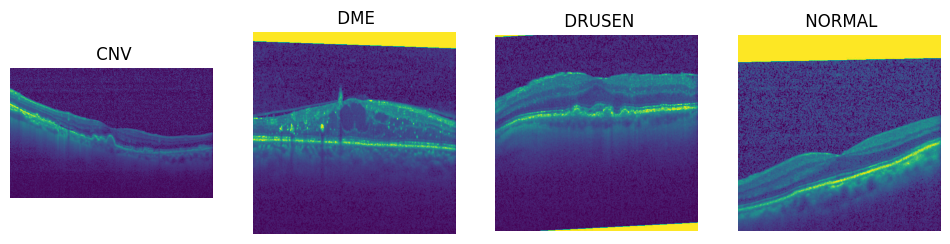

In [45]:
# Specify the classes
classes = ["CNV", "DME", "DRUSEN", "NORMAL"]

# Create a Matplotlib figure and axes
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

# Load and display one example from each class side by side
for i, class_name in enumerate(classes):
    image_path = os.path.join(train_dir, class_name, os.listdir(os.path.join(train_dir, class_name))[0])
    img = imread(image_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f" {class_name}")

plt.show()

model creation

In [46]:
batch_size = 32


In [47]:
image_shape = (256,256,1)


In [48]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.20, # Shift the pic width by a max of 20%
                               height_shift_range=0.15, # Shift the pic height by a max of 15%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.15, # Shear means cutting away part of the image (max 15%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [49]:
image_gen.flow_from_directory(train_dir)


Found 83484 images belonging to 4 classes.


In [50]:
image_gen.flow_from_directory(test_dir)


Found 968 images belonging to 4 classes.


In [51]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(4, activation='softmax'))

In [52]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_191 (Conv2D)             │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_192 (Conv2D)             │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_193 (Conv2D)             │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,269,124 (16.29 MB)

 Trainable params: 4,269,124 (16.29 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping


In [29]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)


In [30]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(299,299),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical', shuffle=True)

Found 83484 images belonging to 4 classes.


In [31]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(299,299),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical', shuffle=False)

Found 968 images belonging to 4 classes.


In [32]:
results = model.fit(train_image_gen,epochs=10, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/10


I0000 00:00:1762528292.002614     147 service.cc:148] XLA service 0x7e18e4008440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762528292.003521     147 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762528292.357756     147 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/2609 ━━━━━━━━━━━━━━━━━━━━ 2:26 56ms/step - accuracy: 0.1250 - loss: 1.6177 

I0000 00:00:1762528297.763098     147 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2609/2609 ━━━━━━━━━━━━━━━━━━━━ 1185s 451ms/step - accuracy: 0.6124 - loss: 0.9571 - val_accuracy: 0.5785 - val_loss: 0.9076
Epoch 2/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 705s 270ms/step - accuracy: 0.7542 - loss: 0.6506 - val_accuracy: 0.6818 - val_loss: 0.7369
Epoch 3/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 703s 269ms/step - accuracy: 0.7925 - loss: 0.5613 - val_accuracy: 0.7655 - val_loss: 0.5987
Epoch 4/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 707s 271ms/step - accuracy: 0.8184 - loss: 0.4967 - val_accuracy: 0.8368 - val_loss: 0.4436
Epoch 5/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 683s 262ms/step - accuracy: 0.8362 - loss: 0.4477 - val_accuracy: 0.8905 - val_loss: 0.3041
Epoch 6/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 687s 263ms/step - accuracy: 0.8547 - loss: 0.4026 - val_accuracy: 0.8843 - val_loss: 0.3141
Epoch 7/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 682s 262ms/step - accuracy: 0.8633 - loss: 0.3817 - val_accuracy: 0.9008 - val_loss: 0.2615
Epoch 8/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 690s 264ms/step - accuracy: 0.

In [33]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.692552,0.795890,0.578512,0.907565
1,0.761918,0.632849,0.681818,0.736914
2,0.795865,0.548515,0.765496,0.598692
3,0.822469,0.485682,0.836777,0.443586
4,0.839442,0.441044,0.890496,0.304119


In [34]:
model.history.history


{'accuracy': [0.692551851272583,
  0.7619184255599976,
  0.7958650588989258,
  0.8224689960479736,
  0.8394423127174377,
  0.857110321521759,
  0.8656628727912903,
  0.8748502731323242,
  0.8813065886497498,
  0.8888289928436279],
 'loss': [0.7958900332450867,
  0.6328489184379578,
  0.548515260219574,
  0.48568204045295715,
  0.44104433059692383,
  0.39981669187545776,
  0.3755110502243042,
  0.35016223788261414,
  0.33380788564682007,
  0.31736916303634644],
 'val_accuracy': [0.5785123705863953,
  0.6818181872367859,
  0.7654958963394165,
  0.836776852607727,
  0.8904958963394165,
  0.8842975497245789,
  0.9008264541625977,
  0.94111567735672,
  0.91425621509552,
  0.8987603187561035],
 'val_loss': [0.9075645208358765,
  0.7369136214256287,
  0.5986917614936829,
  0.4435860812664032,
  0.304118812084198,
  0.3141341805458069,
  0.26153403520584106,
  0.1747712790966034,
  0.2296474575996399,
  0.2576701045036316]}

In [35]:
history_df = pd.DataFrame(model.history.history)
history_df.index.name = 'Epoch'
history_df.index += 1  # Epoch numaralarını 1'den başlat

# DataFrame'i yazdır
print(history_df)

       accuracy      loss  val_accuracy  val_loss
Epoch                                            
1      0.692552  0.795890      0.578512  0.907565
2      0.761918  0.632849      0.681818  0.736914
3      0.795865  0.548515      0.765496  0.598692
4      0.822469  0.485682      0.836777  0.443586
5      0.839442  0.441044      0.890496  0.304119
6      0.857110  0.399817      0.884298  0.314134
7      0.865663  0.375511      0.900826  0.261534
8      0.874850  0.350162      0.941116  0.174771
9      0.881307  0.333808      0.914256  0.229647
10     0.888829  0.317369      0.898760  0.257670


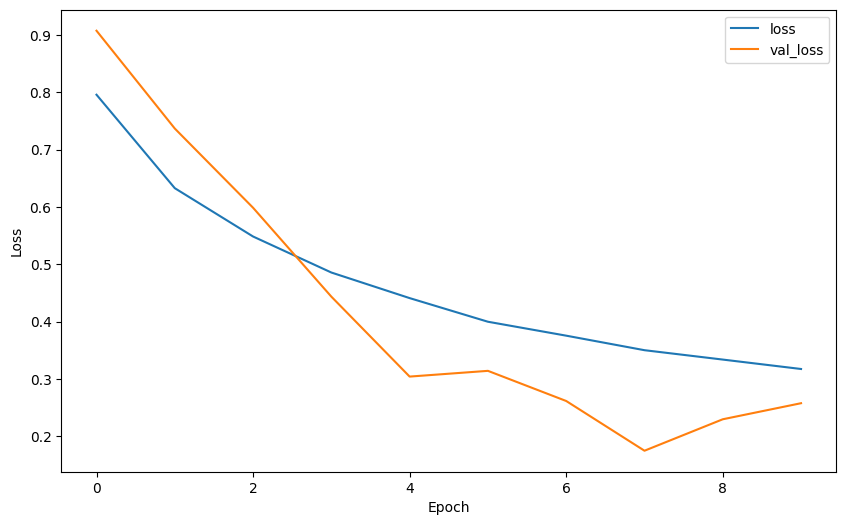

In [36]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

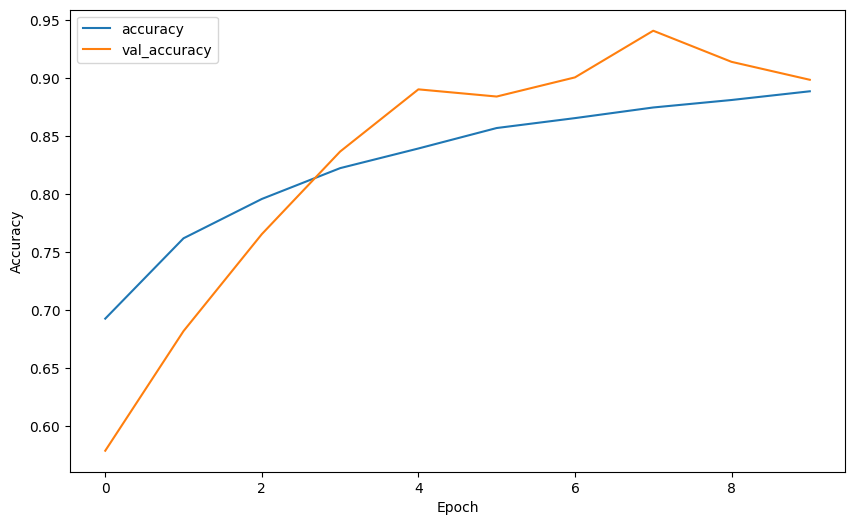

In [37]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [38]:
model.evaluate(test_image_gen)


31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.9323 - loss: 0.1824


[0.22323362529277802, 0.91425621509552]

In [39]:
model.metrics_names


['loss', 'compile_metrics']

In [40]:
pred_probabilities = model.predict(test_image_gen)


31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step


In [41]:
pred_probabilities


array([[9.9932909e-01, 8.9974994e-05, 5.6562416e-04, 1.5366182e-05],
       [7.5675052e-01, 2.4308631e-01, 6.5145941e-05, 9.8031880e-05],
       [9.9708015e-01, 2.9189531e-03, 8.1271259e-07, 7.9916775e-09],
       ...,
       [9.4512165e-05, 5.0181630e-03, 4.3223561e-03, 9.9056506e-01],
       [7.4474054e-04, 7.5490777e-03, 9.5889531e-03, 9.8211724e-01],
       [4.6403897e-03, 2.9065730e-02, 4.3763321e-02, 9.2253053e-01]],
      dtype=float32)

In [42]:
test_image_gen.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [43]:
predictions = pred_probabilities


In [44]:
predictions_argmax = np.argmax(predictions, axis=1)

print(classification_report(test_image_gen.classes, predictions_argmax))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       242
           1       0.98      0.87      0.92       242
           2       0.98      0.81      0.89       242
           3       0.93      0.99      0.96       242

    accuracy                           0.91       968
   macro avg       0.92      0.91      0.91       968
weighted avg       0.92      0.91      0.91       968



In [45]:
model.save('CNN_model1.h5')

MODEL INCEPTIONV3

In [54]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.20, # Shift the pic width by a max of 20%
                               height_shift_range=0.15, # Shift the pic height by a max of 15%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.15, # Shear means cutting away part of the image (max 15%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
batch_size = 32

In [55]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(299,299),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical', shuffle=True)

Found 83484 images belonging to 4 classes.


In [56]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(299,299),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical', shuffle=False)

Found 968 images belonging to 4 classes.


In [57]:
# Define input shape
input_shape = (256, 256, 1)  # Grayscale images with shape 299x299

# Create the input layer
inputs = Input(shape=input_shape)

# Convert grayscale to RGB by repeating the single channel across three channels
x = tf.keras.layers.Concatenate()([inputs, inputs, inputs])

# Load the InceptionV3 model with ImageNet weights, without the top layers, and set the input tensor
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=x)

# Flatten the output of the base model
x = Flatten()(base_model.output)

# Fully connected layers
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)

# Output layer
outputs = Dense(4, activation='softmax')(x)

# Create the model
InceptionV3_model = Model(inputs=inputs, outputs=outputs)

# Optimizer
optimizer = Adam(learning_rate=0.0001)

# Compile the model
InceptionV3_model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

# Print the model summary
InceptionV3_model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 256, 256,  │          0 │ input_layer_4[0]… │
│ (Concatenate)       │ 3)                │            │ input_layer_4[0]… │
│                     │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_194 (Conv2D) │ (None, 127, 127,  │        864 │ concatenate_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │         96 │ conv2d_194[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_195 (Conv2D) │ (None, 125, 125,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_195[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_196 (Conv2D) │ (None, 125, 125,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_196[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 62, 62,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_197 (Conv2D) │ (None, 62, 62,    │      5,120 │ max_pooling2d_14… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_197[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_198 (Conv2D) │ (None, 60, 60,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 59,703,140 (227.75 MB)

 Trainable params: 59,667,172 (227.61 MB)

 Non-trainable params: 35,968 (140.50 KB)

In [58]:
early_stop = EarlyStopping(monitor='val_loss', patience = 4)
checkpoint = ModelCheckpoint('InceptionV3_tuning.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto')

In [62]:
import os
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Concatenate, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# --- Build the model ---
input_shape = (299, 299, 1)   # grayscale OCT
inputs = Input(shape=input_shape)

# replicate 1 channel -> 3 channels for ImageNet backbones
x = Concatenate()([inputs, inputs, inputs])   # shape (256,256,3)

base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=x)

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# --- Compile ---
optimizer = Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

InceptionV3_model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

# Print the model summary
InceptionV3_model.summary()



# --- Callbacks ---
ckpt_path = 'InceptionV3_tuning.keras'
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=False)
checkpoint = ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_best_only=True,
    verbose=1,
    mode='auto'
)


# --- Train (no `model=` arg here) ---
history = model.fit(
    train_image_gen,
    epochs=10,
    validation_data=test_image_gen,
    callbacks=[early_stop, checkpoint]
)

# --- Load the best checkpoint AFTER training (now the file exists) ---
best_model = load_model(ckpt_path)
# (optional) evaluate the best checkpoint
best_model.evaluate(test_image_gen)


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 256, 256,  │          0 │ input_layer_4[0]… │
│ (Concatenate)       │ 3)                │            │ input_layer_4[0]… │
│                     │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_194 (Conv2D) │ (None, 127, 127,  │        864 │ concatenate_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │         96 │ conv2d_194[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_195 (Conv2D) │ (None, 125, 125,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_195[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_196 (Conv2D) │ (None, 125, 125,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_196[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 62, 62,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_197 (Conv2D) │ (None, 62, 62,    │      5,120 │ max_pooling2d_14… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_197[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_198 (Conv2D) │ (None, 60, 60,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 59,703,140 (227.75 MB)

 Trainable params: 59,667,172 (227.61 MB)

 Non-trainable params: 35,968 (140.50 KB)

Epoch 1/10


I0000 00:00:1762548162.643380     149 service.cc:148] XLA service 0x7b1544004110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762548162.644174     149 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762548168.098039     149 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1762548204.021410     149 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2609/2609 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.8552 - loss: 0.4182
Epoch 1: val_loss improved from inf to 0.05038, saving model to InceptionV3_tuning.keras
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 1221s 432ms/step - accuracy: 0.8553 - loss: 0.4182 - val_accuracy: 0.9866 - val_loss: 0.0504
Epoch 2/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9485 - loss: 0.1610
Epoch 2: val_loss did not improve from 0.05038
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 750s 288ms/step - accuracy: 0.9485 - loss: 0.1610 - val_accuracy: 0.9938 - val_loss: 0.0511
Epoch 3/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.9541 - loss: 0.1411
Epoch 3: val_loss did not improve from 0.05038
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 733s 281ms/step - accuracy: 0.9541 - loss: 0.1411 - val_accuracy: 0.9783 - val_loss: 0.0671
Epoch 4/10
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9590 - loss: 0.1245
Epoch 4: val_loss improved from 0.05038 to 0.03803, saving model to InceptionV3_tuning.keras
2609/

[0.032079003751277924, 0.9907024502754211]